In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
from wordcloud import WordCloud

In [3]:
os.getcwd()

'C:\\Users\\amit.srivastava\\Desktop\\mine\\Python\\EXAMS'

In [4]:
os.chdir(r"C:\Users\amit.srivastava\Desktop\mine\Python\EXAMS")

In [5]:
reviews = pd.read_csv("Consumer_Reviews_of_Amazon_Products_May19.csv")

In [6]:
reviews.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
#Answer no 1
reviews.shape

(28332, 24)

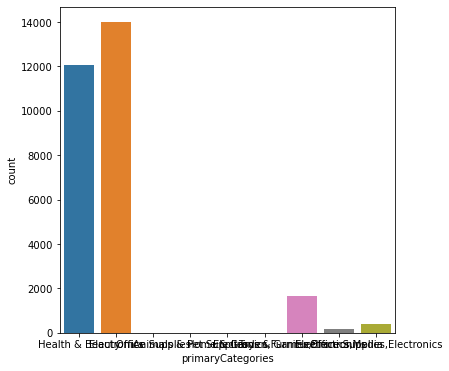

In [18]:
#Answer no 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6, 6))
ax=sns.countplot(x="primaryCategories",data=reviews)

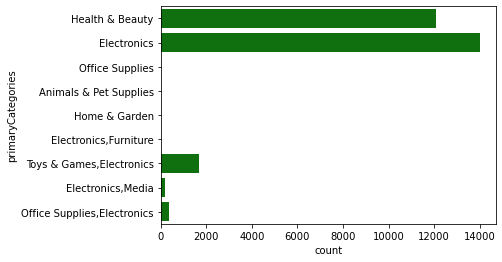

In [9]:
# Answer No 3
import numpy as np
import matplotlib.pyplot as plt
sns.countplot(y="primaryCategories",data=reviews, color='Green')

In [10]:
#!pip install pip -U --user
#!pip install setuptools -U --user
#!pip install -U spacy --user
#!python -m spacy download en_core_web_sm

In [11]:
#Answer No 4
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()
res = []
reviews_combined = " ".join(reviews[reviews['reviews_rating']==1].reviews_text)
doc = nlp(reviews_combined[:51])

for token in doc:
    res.append([token.text, token.lemma_, token.pos_, token.tag_, token.is_alpha, token.is_stop])
pd.DataFrame(res,columns=["text","lemma_","pos","tag","is_alpha","is_stop"])

,text,lemma_,pos,tag,is_alpha,is_stop
0,I,-PRON-,PRON,PRP,True,True
1,do,do,AUX,VBP,True,True
2,n't,not,PART,RB,False,True
3,know,know,VERB,VB,True,False
4,if,if,SCONJ,IN,True,True
5,I,-PRON-,PRON,PRP,True,True
6,would,would,VERB,MD,True,True
7,buy,buy,VERB,VB,True,False
8,thus,thus,ADV,RB,True,True
9,brand,brand,NOUN,NN,True,False


In [12]:
reviews.reviews_rating.value_counts()


5    19897
4     5648
3     1206
1      965
2      616
Name: reviews_rating, dtype: int64

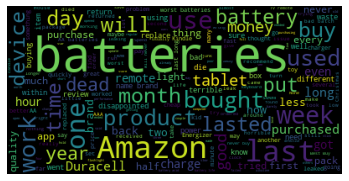

In [13]:
#Answer No 5
text = ' '.join(reviews[reviews['reviews_rating']==1].reviews_text)
wordcloud = WordCloud().generate(text)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

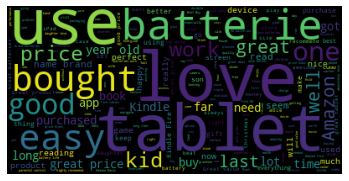

In [14]:
#Answer No 6
text = ' '.join(reviews[reviews['reviews_rating']==5].reviews_text)
wordcloud = WordCloud().generate(text)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

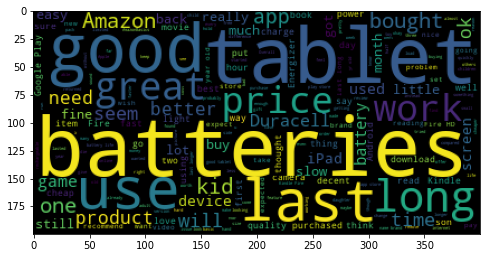

In [15]:
#Answer No 7 
text = ' '.join(reviews[reviews['reviews_rating']==3].reviews_text)
wordcloud = WordCloud().generate(text)
# Generate plot
plt.figure(figsize=[8,8])
plt.imshow(wordcloud)
plt.show()

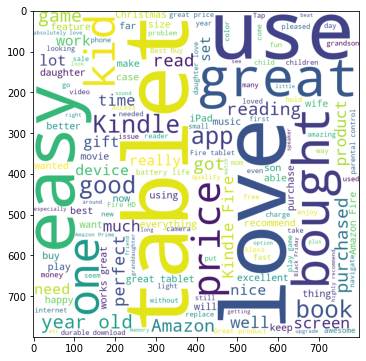

In [16]:
#Answer No 8
r5=reviews[reviews['reviews_rating']==5]
r5e=r5[r5["primaryCategories"]=="Electronics"]
r5e.head()
from wordcloud import WordCloud
r5e_combined = " ".join(r5e.reviews_text.values)
len(r5e_combined)
word_cloudr5e = WordCloud().generate(r5e_combined)
word_cloudr5e
word_cloudr5e = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(r5e_combined)
plt.figure(figsize=[6,6])
plt.imshow(word_cloudr5e)
plt.show()

In [17]:
#Answer No 9
import nltk
from nltk import word_tokenize
positive_rating=reviews[(reviews['reviews_rating']==5)]
positive_rating_Electrnics=positive_rating[positive_rating['primaryCategories']=='Electronics']
text_reviw_title=" ".join(positive_rating_Electrnics.reviews_title.values)
tokens = word_tokenize(text_reviw_title)
nltk.pos_tag(tokens)[:50]

[('Excellent', 'JJ'),
 ('product', 'NN'),
 ('It', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('much', 'RB'),
 ('needed', 'VBN'),
 ('storage', 'NN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('worth', 'JJ'),
 ('it', 'PRP'),
 ('Arrived', 'VBD'),
 ('as', 'IN'),
 ('described', 'NN'),
 ('.', '.'),
 ('Much', 'JJ'),
 ('better', 'JJR'),
 ('sound', 'NN'),
 ('sound', 'VBD'),
 ('than', 'IN'),
 ('2nd', 'CD'),
 ('generation', 'NN'),
 ('Great', 'NNP'),
 ('addition', 'NN'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('living', 'NN'),
 ('room', 'NN'),
 ('Got', 'NNP'),
 ('ta', 'RB'),
 ('have', 'VBP'),
 ('this', 'DT'),
 ('one', 'CD'),
 ('!', '.'),
 ('!', '.'),
 ('Fire', 'NNP'),
 ('stick', 'JJ'),
 ('Great', 'NNP'),
 ('product', 'NN'),
 ('GREAT', 'NN'),
 ('!', '.'),
 ('PRICES', 'NNP'),
 ('Quick', 'NNP'),
 (',', ','),
 ('Simple', 'NNP'),
 (',', ','),
 ('Easy', 'NNP'),
 ('to', 'TO'),
 ('use', 'VB')]